In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [156]:
na_value=[',','.','?','%','#']
data = pd.read_csv('/Users/jv_0327/Downloads/StressLevelDataset.csv',na_values=na_value)

In [130]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,Yes,11,Low,No,2.0,4.0,2,3.0,...,2.0,3,2,3.0,3.0,2,3,3.0,2,1.0
1,15,8,Yes,15,Extrteme,High,1.0,4.0,3,1.0,...,2.0,1,4,1.0,5.0,1,4,5.0,5,2.0
2,12,18,Yes,14,Low,No,2.0,2.0,2,2.0,...,2.0,2,3,3.0,2.0,2,3,2.0,2,1.0
3,16,12,Yes,15,Very High,High,1.0,3.0,4,2.0,...,2.0,2,4,1.0,4.0,1,4,4.0,5,2.0
4,16,28,No,7,Low,High,5.0,1.0,3,2.0,...,3.0,4,3,1.0,2.0,1,5,0.0,5,1.0


In [131]:
data.tail()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
1095,11,17,No,14,High,No,3.0,2.0,2,2.0,...,3.0,2,2,2.0,3.0,3,2,3.0,3,1.0
1096,9,12,No,8,No,High,0.0,0.0,0,1.0,...,4.0,0,1,1.0,1.0,1,3,4.0,3,2.0
1097,4,26,No,3,Very Low,Moderate,5.0,2.0,2,3.0,...,4.0,5,1,4.0,1.0,3,1,2.0,1,0.0
1098,21,0,Yes,19,Extrteme,High,1.0,4.0,3,1.0,...,1.0,2,5,1.0,4.0,1,4,4.0,4,2.0
1099,18,6,Yes,15,High,High,0.0,3.0,3,0.0,...,3.0,3,4,3.0,3.0,1,5,1.0,4,2.0


In [132]:
data.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   anxiety_level                 1100 non-null   int64  
 1   self_esteem                   1100 non-null   int64  
 2   mental_health_history         1100 non-null   object 
 3   depression                    1100 non-null   int64  
 4   headache                      1099 non-null   object 
 5   blood_pressure                1099 non-null   object 
 6   sleep_quality                 1097 non-null   float64
 7   breathing_problem             1099 non-null   float64
 8   noise_level                   1100 non-null   int64  
 9   living_conditions             1085 non-null   float64
 10  safety                        1100 non-null   int64  
 11  basic_needs                   1097 non-null   float64
 12  academic_performance          1100 non-null   int64  
 13  stu

In [134]:
import missingno as msns

<AxesSubplot:>

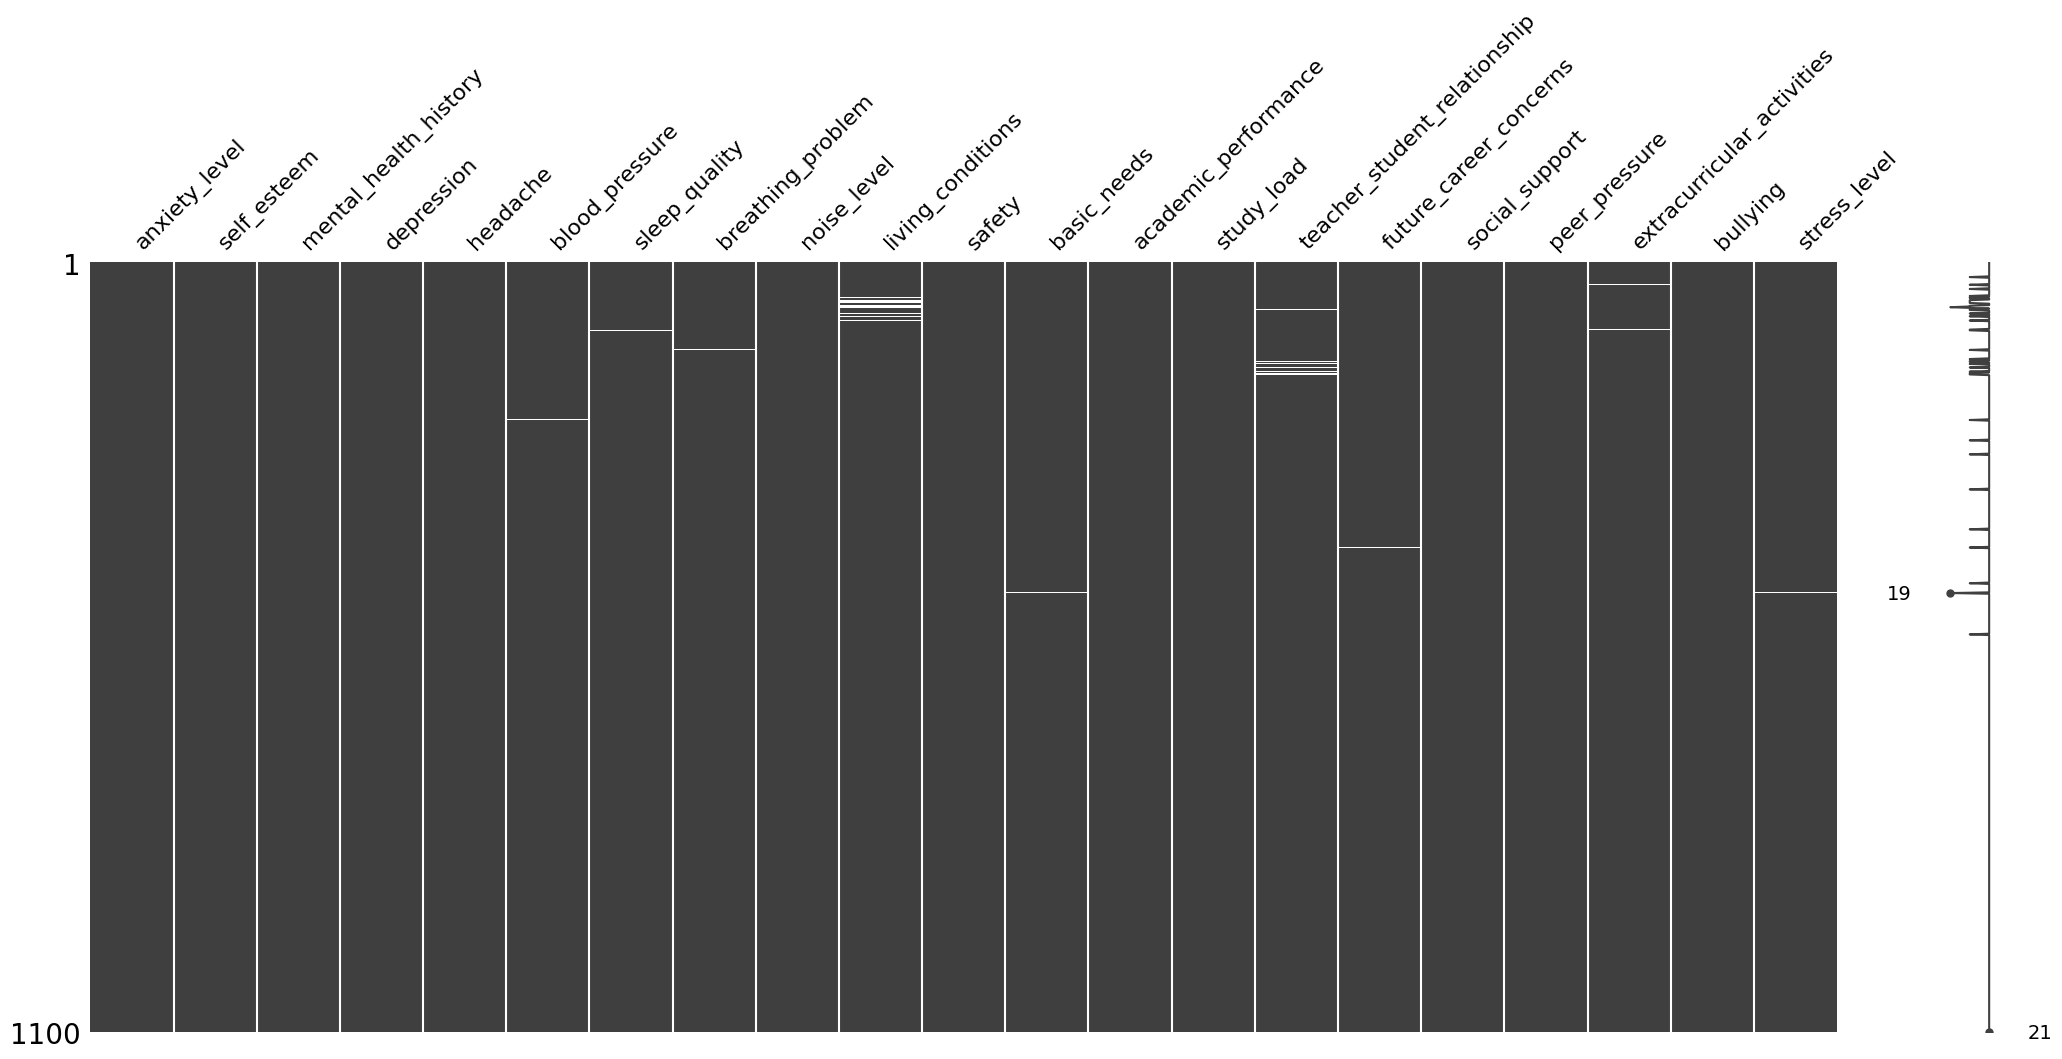

In [135]:
msns.matrix(data)

<AxesSubplot:>

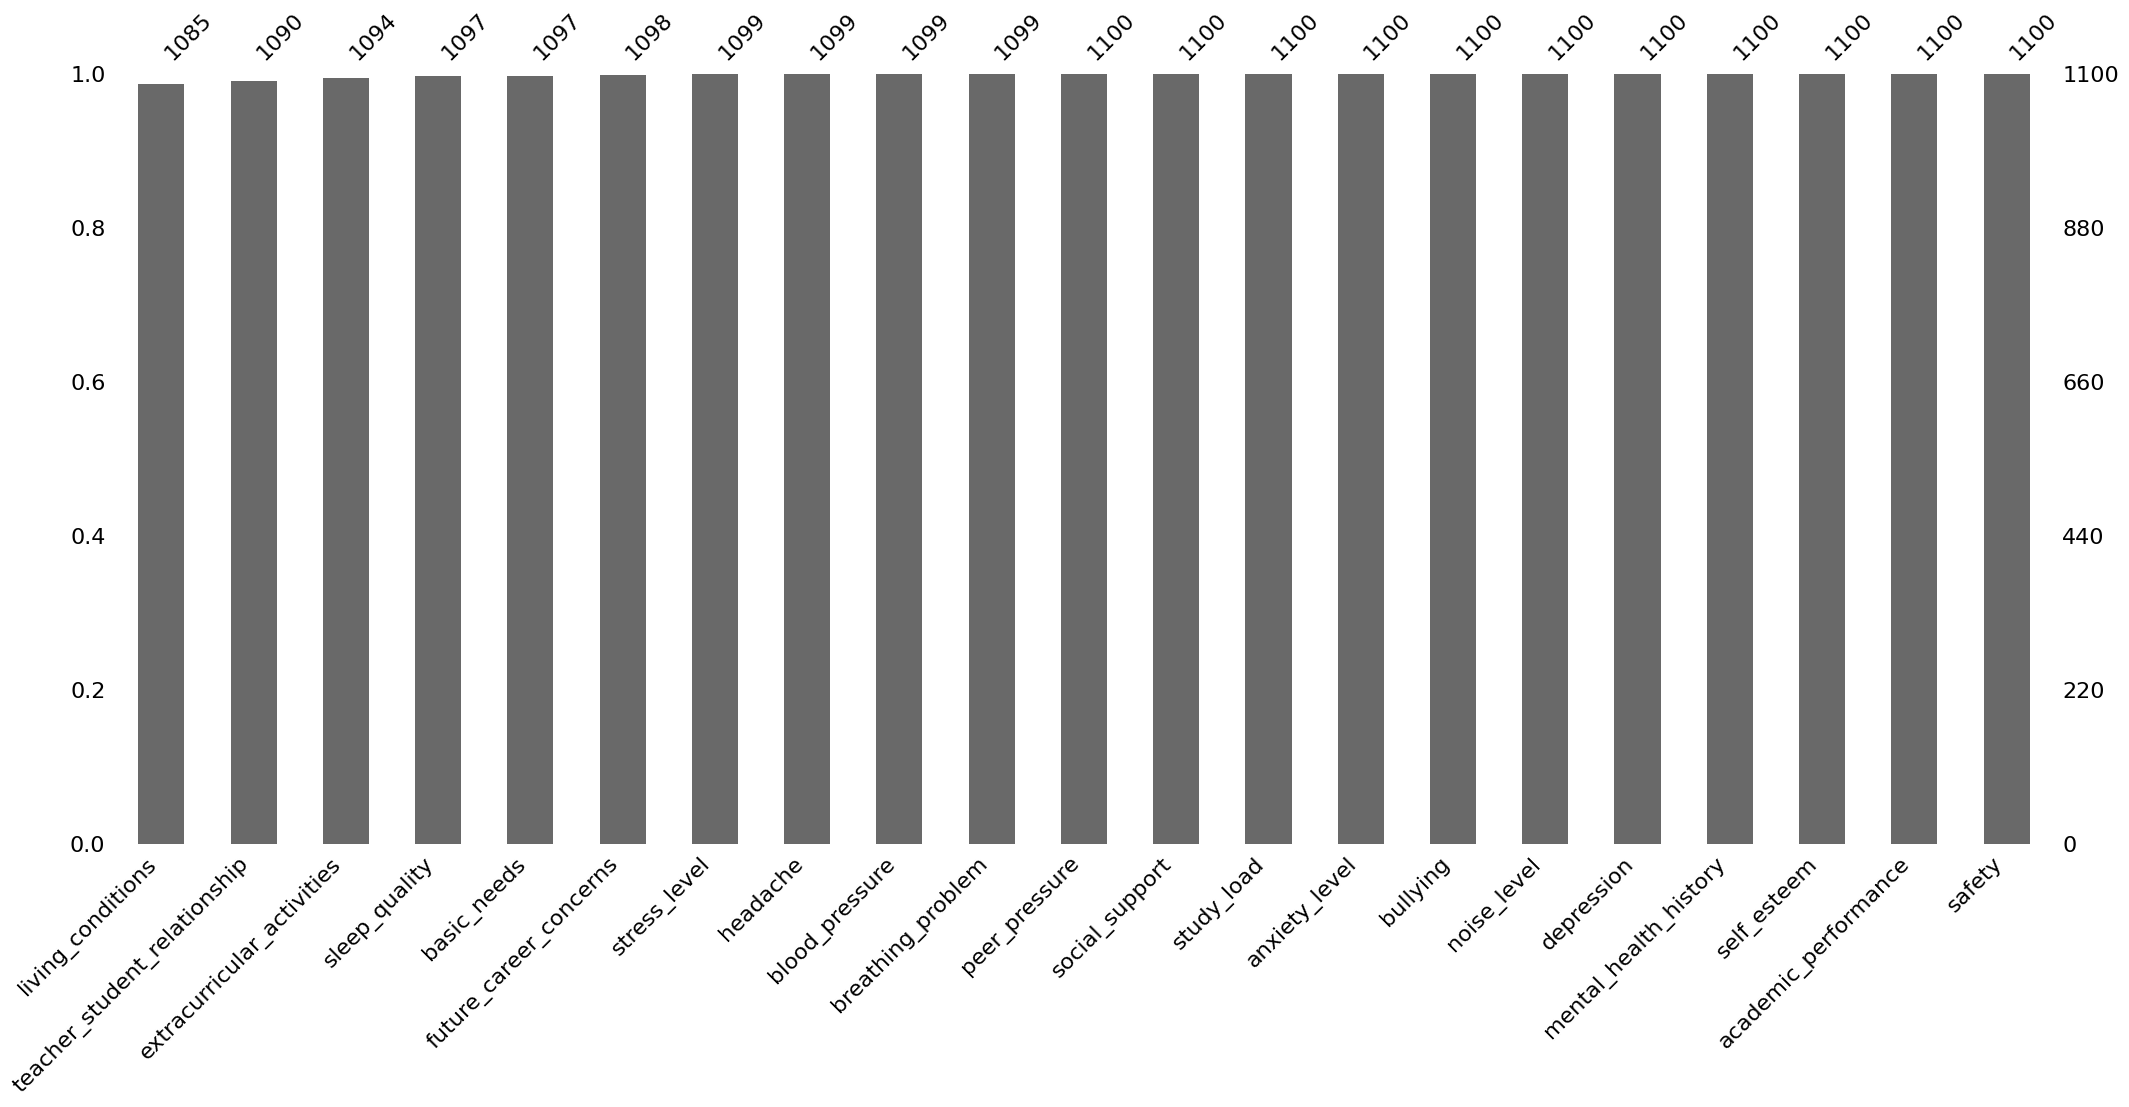

In [136]:
msns.bar(data,sort='ascending')

In [137]:
import math
def check_missing_(data):
    Num_missing = data.isnull().sum()
    Num_missing_dtype = data.dtypes
    Num_missing_per = 100 * data.isnull().sum()/len(data)
    Num_Miss_Perce = pd.concat([Num_missing,Num_missing_per, Num_missing_dtype],axis=1)
    Missing_table_rename = Num_Miss_Perce.rename(columns=
                                                 {0:'Missing Values',
                                                  1:'Percentage of Missing',
                                                  2:'DataTypes'})
    Missing_table_rename = Missing_table_rename[Missing_table_rename.iloc[:,1]!=0].sort_values('Percentage of Missing', 
                                                                                               ascending=False).round(1)
    print(f'Your selected dataframe is {data.shape[0]} rows and {data.shape[1]} 
          columns and There are {Missing_table_rename.shape[0]} columns have null values')
    return Missing_table_rename

In [138]:
check_missing_(data)

Your selected dataframe is 1100 rows and 21 columns and There are 10 columns have null values


,Missing Values,Percentage of Missing,DataTypes
living_conditions,15,1.4,float64
teacher_student_relationship,10,0.9,float64
extracurricular_activities,6,0.5,float64
sleep_quality,3,0.3,float64
basic_needs,3,0.3,float64
future_career_concerns,2,0.2,float64
headache,1,0.1,object
blood_pressure,1,0.1,object
breathing_problem,1,0.1,float64
stress_level,1,0.1,float64


In [127]:
#Handling Missing values

In [128]:
check_missing_(data)

Your selected dataframe is 1100 rows and 21 columns and There are 9 columns have null values


,Missing Values,Percentage of Missing,DataTypes
living_conditions,14,1.3,object
teacher_student_relationship,10,0.9,float64
extracurricular_activities,6,0.5,float64
sleep_quality,3,0.3,float64
future_career_concerns,2,0.2,float64
headache,1,0.1,object
blood_pressure,1,0.1,object
breathing_problem,1,0.1,float64
basic_needs,1,0.1,object


In [145]:
#Handling Missing Values

In [229]:
data_cols = data.columns[data.isnull().any()]

In [230]:
Null_df = data[data_cols]

<AxesSubplot:>

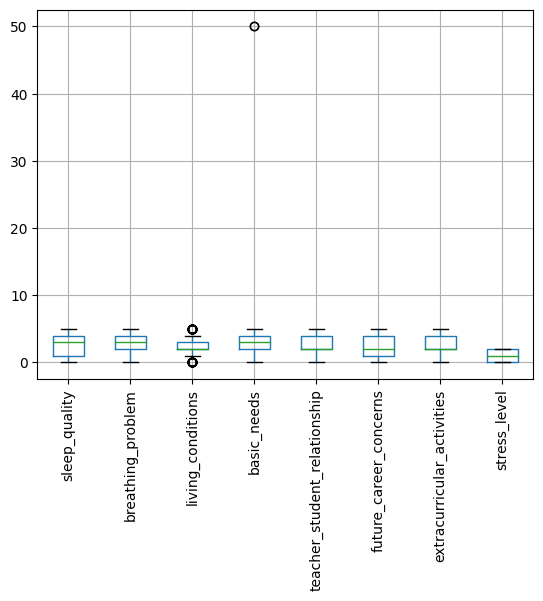

In [231]:
Null_df.boxplot(rot=90)

In [179]:
#Remove Null values from entire dataframe

In [180]:
updated_df = data.dropna(axis=1)

In [190]:
updated_df_row = data.dropna(axis=0)

In [181]:
check_missing_(updated_df)

Your selected dataframe is 1100 rows and 11 columns and There are 0 columns have null values


,Missing Values,Percentage of Missing,DataTypes


In [182]:
#Handle Missing Values using fillna constant value of object columns only

In [185]:
update_constant = data.select_dtypes(include='object').fillna('NullValues')

In [186]:
check_missing_(update_constant)

Your selected dataframe is 1100 rows and 3 columns and There are 0 columns have null values


,Missing Values,Percentage of Missing,DataTypes


In [187]:
#Handle Missing Values using fillna constant 0 value of numerical columns only
update_constant_num = data.select_dtypes(exclude='object').fillna(0)

In [188]:
check_missing_(update_constant_num)

Your selected dataframe is 1100 rows and 18 columns and There are 0 columns have null values


,Missing Values,Percentage of Missing,DataTypes


In [191]:
#Using Mean
update_mean = data['sleep_quality'].fillna(data['sleep_quality'].mean()) 

In [198]:
#using Median
update_median = data[['living_conditions','basic_needs']].fillna(data[['living_conditions','basic_needs']].median())

In [345]:
#using Mode
update_mode = data['headache'].fillna(data['headache'].mode()[0])

In [249]:
from sklearn.impute import SimpleImputer
#Simple imputer is basic imputer that fills missing values with a constant, the mean, median, or the mode

In [214]:
my_imp = SimpleImputer(strategy='median')

In [251]:
df = Null_df.select_dtypes(exclude='object')
new = pd.DataFrame(my_imp.fit_transform(df),columns=df.columns)

In [252]:
check_missing_(new)

Your selected dataframe is 1100 rows and 8 columns and There are 0 columns have null values


,Missing Values,Percentage of Missing,DataTypes


In [258]:
#Iterativeimputer uses regression models to impute missing values. Its iteratively imputes each feature using other features
dat = {
    'A':[1,2,None,4],
    'B':[5,None,7,8]
}
dat = pd.DataFrame(dat)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
it = IterativeImputer()
df_i = pd.DataFrame(it.fit_transform(dat),columns = dat.columns)


In [260]:
#KNN imputer imputes missing values using K Nearest Neighbors
from sklearn.impute import KNNImputer
kn= KNNImputer()
Kn_i = pd.DataFrame(kn.fit_transform(dat),columns = dat.columns)

In [261]:
Kn_i

,A,B
0,1.000000,5.000000
1,2.000000,6.666667
2,2.333333,7.000000
3,4.000000,8.000000


In [270]:
pd.Categorical(Null_df['headache']).codes

array([2, 0, 2, ..., 5, 0, 1], dtype=int8)

In [276]:
Null_df['headache'].mode()

0    Very Low
Name: headache, dtype: object

In [280]:
imputer = SimpleImputer(add_indicator=True)
imputer.fit_transform(Null_df[['basic_needs']])

array([[2., 0.],
       [2., 0.],
       [2., 0.],
       ...,
       [4., 0.],
       [1., 0.],
       [3., 0.]])

In [387]:
def handling_missing_(data):
    from sklearn.impute import SimpleImputer
    sm = SimpleImputer(strategy='mean')
    data_cols = data.columns[data.isnull().any()]
    dat_num = data.select_dtypes(exclude ='object')
    dat_num = pd.DataFrame(sm.fit_transform(dat_num),columns=dat_num.columns)
    data.update(dat_num)
    
    
    dat_cat = data.select_dtypes(include = 'object')
    for i in dat_cat.columns:
        s = dat_cat[i].fillna(dat_cat[i].mode()[0]) 
        data.update(s)
    return check_missing(data)

    

In [388]:
handling_missing_(Null_df)

Your selected dataframe is 1100 rows and 10 columns and There are 0 columns have null values


,Missing Values,Percentage of Missing,DataTypes
